<a href="https://colab.research.google.com/github/thaismazzo/Python_studies/blob/main/Resolucao_de_EDOs_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resolução de EDOs

Considere o tanque apresentado na **Figura1**

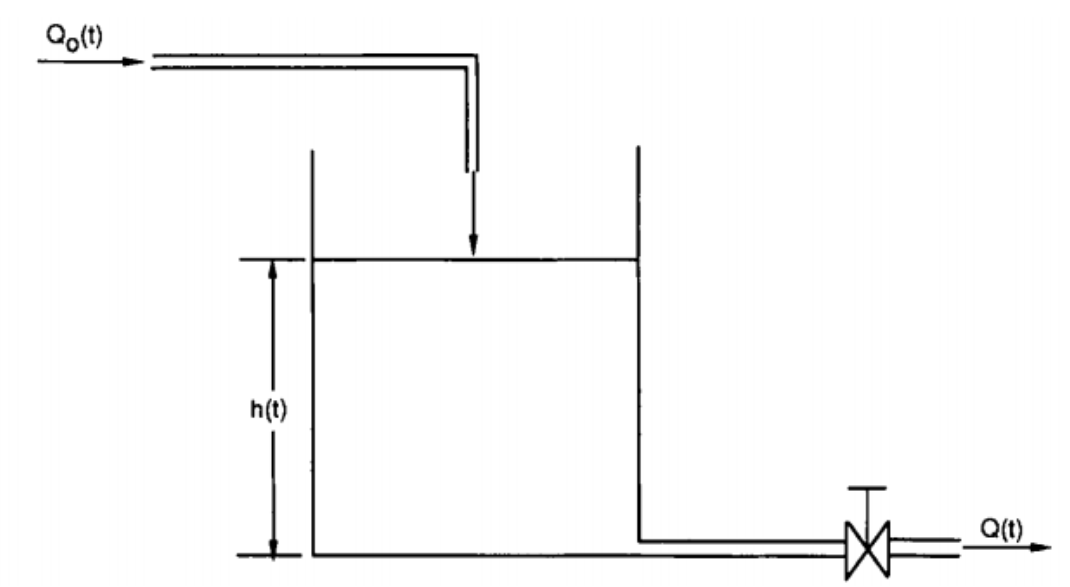

A dinâmica do nível de fluido em um tanque de armazenamento pode ser descrita de acordo com a seguinte equação diferencial ordinária, apresentada na **Equação 1.**

$\frac{dh}{dt} = a + b \sqrt{h}$

Em que he é o nível de fluido no tanque. Os parãmetro **a** e **b** são descritos nas **Equações 2 e 3.**

$a = \frac{Q_{0}}{A}$

$b = -\frac{C_{v}}{A}$


Sendo $Q_{0}$ a vazão volumétrica de líquido na entrada no tanque, $A$ e área de seção transversal e $C_{v}$ o coeficiente de descarga.

## *Questão 1*)

Considere um tanque de armazenamento com uma área de seção transversal de $5000\ cm^{2}.$ Nesse sistema, o coeficiente de descarga vale $500\ \frac{cm^{2,5}}{s}$ e a válvula de entrada de fluido posui uma vazão volumétrica constante e de valor igual a $10,000\ \frac{cm^{3}}{s}.$

Pede-se: Com base nas informações do problema, encontre o perfil de altura de fluido no tanque em função do tempo para os primeiros 1200 segundos de operação após a abertura da válvula de entrada de fluido, sabendo que no instante inical (t=0), o nível do tanque é de 100 cm. Para isso, desenvolva um algoritmo computacional para os itens a **a)** até **f)** que resolva a EDO do sistema:



* Usando o método de Euler, com um passo de 1 segundos;
* Usando o método de Euler, com um passo de 50 segundos;
* Usando o método do ponto médio, com um passo de 1 segundos;
* Usando o método de preditor-corretor, com um passo de 1 segundos;
* Usando o método de Ralston, com um passo de 1 segundos;
* Usando o método de Runge-Kutta de 4ºordem, com um passo de 1 segundos;
* Resolva a EDO do sistema analiticamente;
* Compare graficamente o perfil de nível do tanque com o tempo para o método de Euler com passo de 1 a 50 segundos;
* Compare os resultados obtidos atráves de cada método numérico com a solução analítica para o tempo de 1200 segundos atráves do erro relativo percentual. Plote os gráficos de perfil de nível do tanque com o tempo para cada método.



$h'(t) = a +b\sqrt{h} $

$h(t=0) = 100$

## Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.integrate import odeint
import math

## Funções 

In [ ]:
def dhdt(h,t=0): #é o nosso f1 (derivada)
  A = 5000  #cm^2
  C = 500   #cm^2,5/s
  Q = 10000 #cm^3/s
  a = C/A
  b = Q/A
  dhdt = b - a*((h)**(1/2))
  return dhdt

def euler(dhdt,t0,tf,h0,passo):
  h1 = h0 + dhdt(h0)*passo
  t1 = t0 + passo
  n = int((tf-t0)/passo)
  for i in range(1,n):
    t0 = t1
    h0 = h1
    h1 = h0 + passo*dhdt(h0)
    t1 = t0 + passo
  return t1,h1

#Definindo o método de Euler
def pontomedio(dhdt,t0,tf,h0,passo):
  h1 = h0 + dhdt(h0)*passo
  t1 = t0 + passo/2
  n = int((tf-t0)/(passo/2))
  for i in range(1,n):
    t0 = t1
    h0 = h1
    h1 = h0 + (passo/2)*dhdt(h0)
    t1 = t0 + passo/2
  return t1,h1

# Método da Preditor - Corretor
def heun(dhdt,t0,tf,h0,passo):
  erro = 0.01
  maxit = tf
  inclin = dhdt(h0) #y0'
  h1 = h0 + inclin*passo #preditor (y1(0))
  h1linha = dhdt(h1) #melhorando a estimativa (y1')
  hlinha = (h1linha + inclin)/2 #y'
  h1corr = h0 + hlinha  #corretor
  t1 = t0 + passo
  iter = 0
  ea = (h1corr - h0)/h1corr
  while True:
    iter = iter + 1
    if (maxit <= iter) and (ea <= erro):
      break
    t0 = t1 #atualizando o tempo
    t1 = t0 + passo #atualizando o tempo 
    h0 = h1corr

    inclin = dhdt(h0) #y0'
    h1 = h0 + inclin*passo #preditor (y1(0))
    h1linha = dhdt(h1) #melhorando a estimativa (y1')
    hlinha = (h1linha + inclin)/2 #y'
    h1corr = h0 + hlinha  #corretor
    ea = (h1corr - h0)/h1corr
  return t1, h1corr, ea

# Método Ralston
def ral(dhdt,t0,tf,h0,passo):
  k1 = dhdt(h0)
  k2 = dhdt(h0+(3/4)*k1*passo)
  h1 = h0 + ((1/3)*k1+(2/3)*k2)*passo
  t1 = t0 + passo
  n = int((tf-t0)/passo)
  for i in range(1,n):
    t0 = t1
    h0 = h1
    k1 = dhdt(h1)
    k2 = dhdt(h1+(3/4)*k1*passo)
    h1 = h0 + ((1/3)*k1+(2/3)*k2)*passo
    t1 = t0 + passo
  return t1,h1

# Método Runge-Kutta
def rk4(dhdt,t0,tf,h0,passo):
  t1 = t0 + passo
  k1 = dhdt(h0)
  k2 = dhdt(h0+(1/2)*k1*passo)
  k3 = dhdt(h0+(1/2)*k2*passo)
  k4 = dhdt(h0+k3*passo)
  h1 = h0 + passo*(k1+2*k2+2*k3+k4)*(1/6)
  n = int((tf-t0)/passo)
  for i in range(1,n):
    t0 = t1
    h0 = h1
    k1 = dhdt(h0)
    k2 = dhdt(h0+(1/2)*k1*passo)
    k3 = dhdt(h0+(1/2)*k2*passo)
    k4 = dhdt(h0+k3*passo)
    h1 = h0 + passo*(k1+2*k2+2*k3+k4)*(1/6)
    t1 = t0 + passo
  return t1,h1
# Erro porcentual
def erro_percentual(ana,met):
  erro = (1 - (math.fabs((ana-met))/(ana)))*100
  return erro
# Função de Interpolação
def interpola(a,b,c,d,e):
  '''Função para interpolar escalar não - lineares''' 
  den1 = a-c
  num1 = b-c
  num3 = d-e
  interpolador = ((num1/den1)*num3)+e
  return interpolador


In [ ]:
#Euler com passo de 1 segundo
t1,h1 = euler(dhdt,0,1200,100,1)
print("Método de Euler (Passo = 1) h(t):",round(h1,3),"cm")
#Método de Euler para 50 segundos
t50,h50 = euler(dhdt,0,1200,100,50)
print("Método de Euler (Passo = 50) h(t):",round(h50,3),"cm")

Método de Euler (Passo = 1) h(t): 387.882 cm
Método de Euler (Passo = 50) h(t): 389.1 cm


In [ ]:
# Método do Ponto médio com o Passo de 1 segundo

t1,h1 = pontomedio(dhdt,0,1200,100,1)
print("Método do Ponto Médio h(t):",round(h1,3),"cm")

Método do Ponto Médio h(t): 387.87 cm


In [ ]:
#MÉTODO PREDITOR-CORRETOR COM PASSO IGUAL A 1

h0 = 100
t1,h1corr, ea = heun(dhdt,0,1200,100,1)
print("Método do Preditor-Corretor h(t):",round(h1corr,3),"cm")

Método do Preditor-Corretor h(t): 387.828 cm


In [ ]:
#MÉTODO DE RALSTON COM PASSO DE 1 SEGUNDO
t1,h1 = ral(dhdt,0,1200,100,1)
print("Método do Ralston h(t):",round(h1,3),"cm")

Método do Ralston h(t): 387.828 cm


In [ ]:
# Runge-Kutta de 4ºordem, com um passo de 1 segundos;
t1,h1 = rk4(dhdt,0,1200,100,1)
print("Método de Runge-Kutta de 4° ordem h(t):",round(h1,3),"cm")

Método de Runge-Kutta de 4° ordem h(t): 387.828 cm


*Passos para obtenção da solução analítica*

$h'(t) = a +b\sqrt{h} $

$h(t=0) = 100$

$\int_{100}^{h(t)}\frac{dh}{a+b\sqrt{h}}=\int_0^t dt$

$t = \frac{2}{b^2}(a+b\sqrt{h}-a\ln (a+b\sqrt{h})) - \frac{2}{b^2}(a+b\sqrt{h0}-a\ln (a+b\sqrt{h0})) $



In [ ]:
# Resultado Analítico
import numpy as np
import math 
import pandas as pd
def analitico1(h):
  A = 5000  
  C = 500   
  Q = 10000 
  h0 = 100 
  b = -(C/A) 
  a = (Q/A)
  t = (2/(b**2)) * (a+b*((h)**(0.5))-a*math.log((a+b*((h)**(0.5)))))    -  (2/(b**2))*(a+b*((h0)**(0.5))-a*math.log((a+b*((h0)**(0.5)))))

  return t

h_inicial = 100 # Altura inicial do tanque.
h_final   = 388 # depois de 400 não funciona 
vazio = []
for i in range(h_inicial,h_final+1): # Fazer um list compression depois 
  armazenamento = [analitico1(i),i]
  vazio.append(armazenamento)
tabela = pd.DataFrame(vazio)
results = tabela.rename(columns={0:"tempo",1:"h(t)"})
print(results)
#Vamos fazer interpolação
# Supondo uma linearidade entre os dados, encontra-se o valor da altura para o tempo de 1200 segundos

z = interpola(1173.869424,1200,1205.634523,387,388)
w = round(z,3)
vetor = np.array([387.881,389.100,387.870,387.828,387.828,387.828])

erros = []
for i in range(len(vetor)):
  esse = erro_percentual(w,i)
  erros.append(esse)

erros = np.array(erros)
tabela = pd.DataFrame([vetor,erros])
tabela = tabela.transpose()
tabela = tabela.rename(columns={0:"h(1200s)",1:"Erro percentual (%)"},index={0:"Euler (Passo = 1s)",1:"Euler (Passo = 50s)",2:"Ponto Médio",3:"Preditor-Corretor",4:"Ralston",5:"Runge-Kutta (4° ordem)"})
tabela


           tempo  h(t)
0       0.000000   100
1       1.002504   101
2       2.010034   102
3       3.022614   103
4       4.040271   104
..           ...   ...
284  1091.570602   384
285  1117.133540   385
286  1144.478381   386
287  1173.869424   387
288  1205.634523   388

[289 rows x 2 columns]


,h(1200s),Erro percentual (%)
Euler (Passo = 1s),387.881,0.000000
Euler (Passo = 50s),389.100,0.257850
Ponto Médio,387.870,0.515699
Preditor-Corretor,387.828,0.773549
Ralston,387.828,1.031398
Runge-Kutta (4° ordem),387.828,1.289248


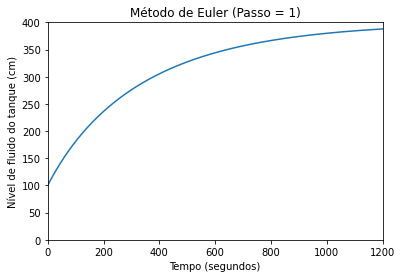

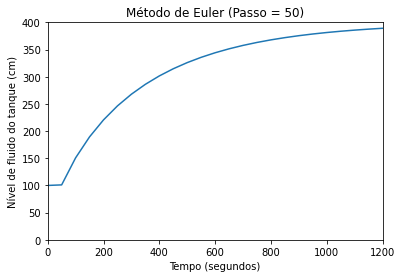

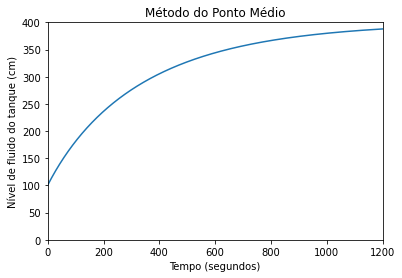

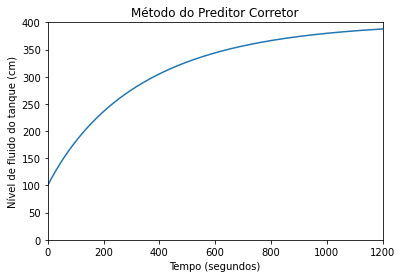

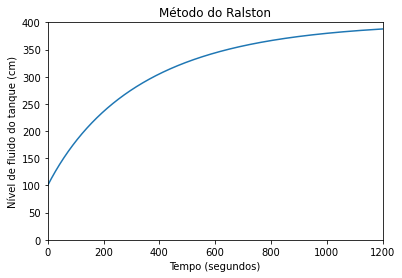

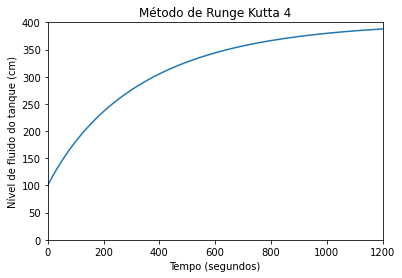

In [ ]:
#GRÁFICOS COMPARATIVOS
import matplotlib.pyplot as plt
import numpy as np


def euler_grafico(dhdt,t0,tf,h0,passo):
  lista1 = []
  lista2 = []
  
  h1 = h0 + dhdt(h0)
  t1 = t0 + passo
  lista1.append(t0)
  lista1.append(t1)
  lista2.append(h0)
  lista2.append(h1)
  n = int((tf-t0)/passo)
  for i in range(1,n):
    t0 = t1
    h0 = h1
    h1 = h0 + passo*dhdt(h0)
    t1 = t0 + passo
    lista1.append(t1)
    lista2.append(h1)
  return lista1,lista2

def pontomedio_grafico(dhdt,t0,tf,h0,passo):
  lista1 = []
  lista2 = []
  h1 = h0 + dhdt(h0)
  t1 = t0 + passo/2
  n = int((tf-t0)/(passo/2))
  lista1.append(t0)
  lista1.append(t1)
  lista2.append(h0)
  lista2.append(h1)
  for i in range(1,n):
    t0 = t1
    h0 = h1
    h1 = h0 + (passo/2)*dhdt(h0)
    t1 = t0 + passo/2
    lista1.append(t0)
    lista1.append(t1)
    lista2.append(h0)
    lista2.append(h1)
  return lista1,lista2

def heun_grafico(dhdt,t0,tf,h0,passo):
  lista1 = []
  lista2 = []
  erro = 0.01
  maxit = tf
  inclin = dhdt(h0) #y0'
  h1 = h0 + inclin*passo #preditor (y1(0))
  h1linha = dhdt(h1) #melhorando a estimativa (y1')
  hlinha = (h1linha + inclin)/2 #y'
  h1corr = h0 + hlinha  #corretor
  t1 = t0 + passo
  iter = 0
  ea = (h1corr - h0)/h1corr
  lista1.append(t0)
  lista1.append(t1)
  lista2.append(h0)
  lista2.append(h1corr)
  while True:
    iter = iter + 1
    if (maxit <= iter) and (ea <= erro):
      break
    t0 = t1 #atualizando o tempo
    t1 = t0 + passo #atualizando o tempo 
    h0 = h1corr

    inclin = dhdt(h0) #y0'
    h1 = h0 + inclin*passo #preditor (y1(0))
    h1linha = dhdt(h1) #melhorando a estimativa (y1')
    hlinha = (h1linha + inclin)/2 #y'
    h1corr = h0 + hlinha  #corretor
    ea = (h1corr - h0)/h1corr
    lista1.append(t0)
    lista1.append(t1)
    lista2.append(h0)
    lista2.append(h1corr)
  return lista1,lista2

def ral_grafico(dhdt,t0,tf,h0,passo):
  lista1 = []
  lista2 = []
  k1 = dhdt(h0)
  k2 = dhdt(h0+(3/4)*k1*passo)
  h1 = h0 + ((1/3)*k1+(2/3)*k2)*passo
  t1 = t0 + passo
  n = int((tf-t0)/passo)
  lista1.append(t0)
  lista1.append(t1)
  lista2.append(h0)
  lista2.append(h1)
  for i in range(1,n):
    t0 = t1
    h0 = h1
    k1 = dhdt(h1)
    k2 = dhdt(h1+(3/4)*k1*passo)
    h1 = h0 + ((1/3)*k1+(2/3)*k2)*passo
    t1 = t0 + passo
    lista1.append(t0)
    lista1.append(t1)
    lista2.append(h0)
    lista2.append(h1)
  return lista1,lista2

def rk4_grafico(dhdt,t0,tf,h0,passo):
  lista1 = []
  lista2 = []
  t1 = t0 + passo
  k1 = dhdt(h0)
  k2 = dhdt(h0+(1/2)*k1*passo)
  k3 = dhdt(h0+(1/2)*k2*passo)
  k4 = dhdt(h0+k3*passo)
  h1 = h0 + passo*(k1+2*k2+2*k3+k4)*(1/6)
  n = int((tf-t0)/passo)
  lista1.append(t0)
  lista1.append(t1)
  lista2.append(h0)
  lista2.append(h1)
  for i in range(1,n):
    t0 = t1
    h0 = h1
    k1 = dhdt(h0)
    k2 = dhdt(h0+(1/2)*k1*passo)
    k3 = dhdt(h0+(1/2)*k2*passo)
    k4 = dhdt(h0+k3*passo)
    h1 = h0 + passo*(k1+2*k2+2*k3+k4)*(1/6)
    t1 = t0 + passo
    lista1.append(t0)
    lista1.append(t1)
    lista2.append(h0)
    lista2.append(h1)
  return lista1,lista2

valores1  , valores2   =  euler_grafico(dhdt,0,1200,100,1)
valores3  , valores4   =  euler_grafico(dhdt,0,1200,100,50)
valores5  , valores6   =  pontomedio_grafico(dhdt,0,1200,100,1)
valores7  , valores8   =  heun_grafico(dhdt,0,1200,100,1)
valores9  , valores10  =  ral_grafico(dhdt,0,1200,100,1)
valores11 , valores12  =  rk4_grafico(dhdt,0,1200,100,1)

#Gráfico
plt.plot(valores1,valores2)
plt.xlabel("Tempo (segundos)")
plt.ylabel("Nível de fluido do tanque (cm)")
plt.title("Método de Euler (Passo = 1)")
ax = plt.gca()
ax.set_xlim([0,1200])
ax.set_ylim([0,400])
plt.show()
print()
plt.plot(valores3,valores4)
plt.xlabel("Tempo (segundos)")
plt.ylabel("Nível de fluido do tanque (cm)")
plt.title("Método de Euler (Passo = 50)")
ax = plt.gca()
ax.set_xlim([0,1200])
ax.set_ylim([0,400])
plt.show()
print()
plt.plot(valores5,valores6)
plt.xlabel("Tempo (segundos)")
plt.ylabel("Nível de fluido do tanque (cm)")
plt.title("Método do Ponto Médio")
ax = plt.gca()
ax.set_xlim([0,1200])
ax.set_ylim([0,400])
plt.show()
print()
plt.plot(valores7,valores8)
plt.xlabel("Tempo (segundos)")
plt.ylabel("Nível de fluido do tanque (cm)")
plt.title("Método do Preditor Corretor")
ax = plt.gca()
ax.set_xlim([0,1200])
ax.set_ylim([0,400])
plt.show()
print()
plt.plot(valores9,valores10)
plt.xlabel("Tempo (segundos)")
plt.ylabel("Nível de fluido do tanque (cm)")
plt.title("Método do Ralston")
ax = plt.gca()
ax.set_xlim([0,1200])
ax.set_ylim([0,400])
plt.show()
print()
plt.plot(valores11,valores12)
plt.xlabel("Tempo (segundos)")
plt.ylabel("Nível de fluido do tanque (cm)")
plt.title("Método de Runge Kutta 4")
ax = plt.gca()
ax.set_xlim([0,1200])
ax.set_ylim([0,400])
plt.show()